In [1]:
#merge data from several states
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
from pprint import pprint

In [2]:
alldogs_merged = pd.read_csv('./data/alldogs_scoped_merged.csv')
state={'CA':'Los Angeles', 'MN': 'Minneapolis', 'NY':'New York', 'TX': 'Houston'}

In [3]:
len(alldogs_merged)

184542

In [4]:
alldogs_merged.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,Short,[],Benji,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,Short,[],Zuma,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,Medium,[],Diego,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,8


In [66]:
mean_adpt_time = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 184.01237496363595,
 'MN': 102.96562054208273,
 'NY': 227.69666935576814,
 'TX': 140.0659042704393}


In [5]:
alldogs_merged = alldogs_merged[alldogs_merged['adoption_time']<=200]
len(alldogs_merged)

153466

In [6]:
#don't do this, it could be important
#alldogs_merged = alldogs_merged[alldogs_merged['attributes.special_needs']==False]
#len(alldogs_merged)

151513

In [6]:
alldogs_merged = alldogs_merged[alldogs_merged['gender']!='Unknown']
len(alldogs_merged)

153436

In [7]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_merged.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_merged.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_merged.columns
                     if alldogs_merged[col].isnull().any()]

Table size - (153436, 32)
Checking for missing values..
coat                     66953
name                        16
breeds.secondary         88860
colors.primary           50734
colors.secondary        100162
colors.tertiary         151755
attributes.declawed     153436
environment.children    126539
environment.dogs        120748
environment.cats        137443
dtype: int64


In [120]:
alldogs_nm = alldogs_merged.fillna({'name':'Unknown'})

In [121]:
# recheck for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_nm.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_nm.columns
                     if alldogs_nm[col].isnull().any()]

Table size - (153436, 32)
Checking for missing values..
coat                     66953
breeds.secondary         88860
colors.primary           50734
colors.secondary        100162
colors.tertiary         151755
attributes.declawed     153436
environment.children    126539
environment.dogs        120748
environment.cats        137443
dtype: int64


In [122]:
len(alldogs_nm[alldogs_nm['breeds.mixed'] == True])

109689

In [123]:
alldogs_nm = alldogs_nm.drop(missing_cols, axis=1)

In [124]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,True,False,True,True,False,True,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,False,False,True,True,False,True,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,False,False,True,False,False,True,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,False,False,True,False,False,True,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,True,False,True,False,False,True,Los Angeles,CA,90013,8


In [125]:
len(alldogs_nm)

153436

In [126]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [15]:
len(alldogs_nm)

153436

In [127]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags', 'name',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time'],
      dtype='object')

In [128]:
namelist = alldogs_nm['name'].value_counts()
namelist.head()

Bella    499
Max      441
Lucy     438
Daisy    436
Buddy    416
Name: name, dtype: int64

In [129]:
namelist[alldogs_nm['name'].iloc[89983]]/namelist.max()

0.17034068136272545

In [130]:
maxname = namelist.max()

In [131]:
alldogs_nm[alldogs_nm['name'].isnull()]

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,breeds.mixed,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time


In [132]:
def get_norm_name_freq(name):
    return namelist[name]/maxname
get_norm_name_freq(alldogs_nm['name'].iloc[0])

0.20841683366733466

In [133]:
alldogs_nm['norm_name_freq'] = alldogs_nm.apply(lambda x: get_norm_name_freq(x['name']), axis=1)
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,breeds.unknown,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,norm_name_freq
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,False,True,True,False,True,Los Angeles,CA,90013,19,0.208417
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,False,True,True,False,True,Los Angeles,CA,90013,29,0.080160
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,False,True,False,False,True,Los Angeles,CA,90013,18,0.220441
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,False,True,False,False,True,Los Angeles,CA,90013,57,0.018036
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,False,True,False,False,True,Los Angeles,CA,90013,8,0.094188


In [134]:
breedlist = alldogs_nm['breeds.primary'].value_counts()
breedlist.head()

Labrador Retriever     15836
Chihuahua              11104
Terrier                 7489
German Shepherd Dog     6581
Pit Bull Terrier        6371
Name: breeds.primary, dtype: int64

In [135]:
def get_norm_breed_freq(breed):
    return breedlist[breed]/breedlist.max()
alldogs_nm['breeds.primary'].iloc[0]
get_norm_breed_freq(alldogs_nm['breeds.primary'].iloc[0])

0.47290982571356405

In [136]:
alldogs_nm['norm_breed_freq'] = alldogs_nm.apply(lambda x: get_norm_breed_freq(x['breeds.primary']), axis=1)
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,norm_name_freq,norm_breed_freq
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,True,True,False,True,Los Angeles,CA,90013,19,0.208417,0.472910
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,True,True,False,True,Los Angeles,CA,90013,29,0.080160,0.064979
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,True,False,False,True,Los Angeles,CA,90013,18,0.220441,0.020775
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,True,False,False,True,Los Angeles,CA,90013,57,0.018036,0.001010
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,True,False,False,True,Los Angeles,CA,90013,8,0.094188,0.472910


In [222]:
alldogs_nm['norm_name_freq'].describe()

count    153436.000000
mean          0.099055
std           0.162896
min           0.002004
25%           0.002004
50%           0.028056
75%           0.122244
max           1.000000
Name: norm_name_freq, dtype: float64

In [227]:
pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

0           High
1           High
2           High
3         Medium
4           High
           ...  
184384      High
184385    Medium
184386    Medium
184387       Low
184388    Medium
Name: norm_name_freq, Length: 153436, dtype: category
Categories (3, object): [Low < Medium < High]

In [228]:
alldogs_nm['name_pop'] = pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

In [229]:
alldogs_nm['name_pop'].value_counts()

Low       52739
High      50611
Medium    50086
Name: name_pop, dtype: int64

In [230]:
alldogs_nm['breed_pop'] = pd.qcut(alldogs_nm['norm_breed_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])
alldogs_nm['breed_pop'].value_counts()

Medium    55187
Low       50868
High      47381
Name: breed_pop, dtype: int64

In [231]:
alldogs_nm.groupby('breed_pop')['adoption_time'].mean().sort_values()

breed_pop
Medium    38.893236
Low       40.924786
High      41.140436
Name: adoption_time, dtype: float64

In [232]:
alldogs_nm.groupby('name_pop')['adoption_time'].mean().sort_values()

name_pop
Medium    38.379966
Low       41.073134
High      41.275276
Name: adoption_time, dtype: float64

In [257]:
alldogs_nm[alldogs_nm['age']=='Senior'].groupby('breed_pop')['adoption_time'].mean().sort_values()

breed_pop
Medium    54.238475
Low       55.921150
High      58.682297
Name: adoption_time, dtype: float64

In [258]:
alldogs_nm[alldogs_nm['age']=='Senior'].groupby('name_pop')['adoption_time'].mean().sort_values()

name_pop
High      54.703780
Medium    56.241627
Low       56.816552
Name: adoption_time, dtype: float64

In [82]:
z = datetime.strptime(alldogs_nm['status_changed_at'].iloc[0],"%Y-%m-%dT%H:%M:%S%z")

In [90]:
z.year

2015

In [137]:
from datetime import datetime
def get_month(date):
    z = datetime.strptime(date,"%Y-%m-%dT%H:%M:%S%z")
    return z.month

In [138]:
alldogs_nm['month'] = alldogs_nm.apply(lambda x: get_month(x['status_changed_at']), axis=1)

In [139]:
from datetime import datetime
def get_year(date):
    z = datetime.strptime(date,"%Y-%m-%dT%H:%M:%S%z")
    return z.year

In [140]:
alldogs_nm['year'] = alldogs_nm.apply(lambda x: get_year(x['status_changed_at']), axis=1)

In [233]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,norm_name_freq,norm_breed_freq,month,year,name_pop,breed_pop
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,Los Angeles,CA,90013,19,0.208417,0.472910,12,2015,High,High
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,Los Angeles,CA,90013,29,0.080160,0.064979,12,2015,High,Low
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,Los Angeles,CA,90013,18,0.220441,0.020775,12,2015,High,Low
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,Los Angeles,CA,90013,57,0.018036,0.001010,2,2016,Medium,Low
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,Los Angeles,CA,90013,8,0.094188,0.472910,12,2015,High,High


In [142]:
alldogs_nm['year'].value_counts()

2017    17481
2016    17126
2019    17066
2018    16429
2015    16400
2014    15665
2013    14911
2012    13584
2011    11600
2010     7996
2009     2615
2008     1415
2020      835
2007      298
2006       15
Name: year, dtype: int64

In [143]:
alldogs_nm['month'].value_counts()

12    13860
8     13716
9     13471
7     13113
10    12941
1     12697
11    12682
3     12543
4     12531
5     12472
6     12246
2     11164
Name: month, dtype: int64

In [144]:
alldogs_nm.groupby('year')['adoption_time'].mean().sort_values()

year
2008     34.413428
2017     36.176649
2016     36.700280
2018     36.881551
2019     37.853803
2013     39.776742
2015     39.830122
2012     40.939635
2014     41.149697
2011     41.631466
2020     51.918563
2010     55.131941
2009     66.795411
2007     85.483221
2006    103.666667
Name: adoption_time, dtype: float64

In [145]:
alldogs_nm.groupby('month')['adoption_time'].mean().sort_values()

month
2     36.667234
3     37.009168
4     37.899210
5     38.989897
8     39.400992
6     39.716479
10    40.737501
12    40.760173
11    40.858303
7     41.523831
1     42.519572
9     46.116250
Name: adoption_time, dtype: float64

In [153]:
len(alldogs_nm)

153436

In [154]:
months1 = [2,3]
alldogs_nm[alldogs_nm['year'] < 2016]

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,attributes.special_needs,attributes.shots_current,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,norm_name_freq,norm_breed_freq,month,year
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,False,True,Los Angeles,CA,90013,19,0.208417,0.472910,12,2015
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,False,True,Los Angeles,CA,90013,29,0.080160,0.064979,12,2015
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,False,True,Los Angeles,CA,90013,18,0.220441,0.020775,12,2015
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,False,True,Los Angeles,CA,90013,8,0.094188,0.472910,12,2015
86,18769601,AZ181,https://www.petfinder.com/dog/bosco-in-ca-adop...,Adult,Male,Small,[],Bosco in CA-ADOPTED 3/24/11,adopted,2011-03-25T08:01:26+0000,...,False,True,Los Angeles,CA,90012,26,0.002004,0.039151,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184136,24232755,TX734,https://www.petfinder.com/dog/little-beau-jang...,Young,Male,Small,[],Little Beau Jangles,adopted,2012-12-09T22:28:13+0000,...,False,True,Houston,TX,77070,74,0.002004,0.390313,12,2012
184138,24232797,TX734,https://www.petfinder.com/dog/shadow-box-24232...,Young,Male,Small,[],Shadow Box,adopted,2012-10-14T16:15:26+0000,...,False,True,Houston,TX,77070,17,0.002004,0.390313,10,2012
184140,24273469,TX734,https://www.petfinder.com/dog/celeste-24273469...,Young,Male,Small,[],Celeste,adopted,2012-10-14T16:13:41+0000,...,False,True,Houston,TX,77070,12,0.040080,0.390313,10,2012
184143,24273504,TX734,https://www.petfinder.com/dog/slaten-24273504/...,Young,Male,Small,[],Slaten,adopted,2012-10-24T21:43:31+0000,...,False,True,Houston,TX,77070,23,0.002004,0.390313,10,2012


In [234]:
alldogs_nm_year = alldogs_nm[alldogs_nm['year'] >= 2016]

In [235]:
alldogs_nm_year = alldogs_nm_year[alldogs_nm_year['year'] <= 2019]

In [236]:
len(alldogs_nm_year)

68102

In [237]:
alldogs_nm_year.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags', 'name',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time', 'norm_name_freq',
       'norm_breed_freq', 'month', 'year', 'name_pop', 'breed_pop'],
      dtype='object')

In [238]:
X_features = ['age', 'gender', 'size', 'breeds.primary',
              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
              'attributes.special_needs', 'attributes.shots_current', 'contact.address.state', 
              'name_pop', 'breed_pop', 'month']
X = alldogs_nm_year[X_features]
X.head()

,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month
3,Adult,Female,Medium,Xoloitzcuintli / Mexican Hairless,False,True,False,False,True,CA,Medium,Low,2
5,Adult,Female,Small,Maltese,False,True,False,False,True,CA,High,Medium,1
6,Young,Female,Small,Beagle,True,False,False,False,False,CA,Low,Medium,2
7,Young,Male,Small,Terrier,True,True,False,False,True,CA,Medium,High,2
8,Young,Male,Small,Fox Terrier,True,True,False,False,True,CA,Medium,Low,3


In [21]:
X['age'].value_counts()

Young     55488
Baby      51911
Adult     40256
Senior     3829
Name: age, dtype: int64

In [22]:
X['gender'].value_counts()

Male      76377
Female    75107
Name: gender, dtype: int64

In [23]:
X['size'].value_counts()

Medium         60828
Small          58982
Large          29530
Extra Large     2144
Name: size, dtype: int64

In [24]:
X['contact.address.state'].value_counts()

NY    40526
TX    38231
MN    36721
CA    36006
Name: contact.address.state, dtype: int64

In [78]:
test = alldogs_merged['name'].value_counts()
test[test>10]

Bella          499
Max            441
Lucy           438
Daisy          436
Buddy          416
Charlie        394
Jack           337
Molly          335
Lola           312
Bear           280
Bailey         276
Ginger         274
Rocky          262
Penny          258
Toby           252
Maggie         252
Luna           246
Sadie          243
Coco           242
Rosie          238
Lady           237
Sophie         233
Duke           230
Lucky          216
Lily           214
Teddy          210
Ruby           207
Stella         205
Cooper         203
Princess       202
              ... 
Cheerio         11
SKY             11
FOXY            11
ELLA            11
Val             11
Carrot          11
Jess            11
Davis           11
Cherub          11
Jeter           11
Pinkie          11
ROMEO           11
Kimmie          11
Little Bear     11
OREO            11
Jazmine         11
Cadence         11
Alana           11
Monet           11
Barnie          11
Suzie Q         11
Muneca      

In [79]:
test.to_csv('names.csv', header=False, index=True)

In [162]:
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,norm_name_freq,norm_breed_freq,month
3,Adult,Female,Medium,False,True,False,False,True,CA,0.018036,0.001010,2
5,Adult,Female,Small,False,True,False,False,True,CA,0.202405,0.166709,1
6,Young,Female,Small,True,False,False,False,False,CA,0.004008,0.230551,2
7,Young,Male,Small,True,True,False,False,True,CA,0.058116,0.472910,2
8,Young,Male,Small,True,True,False,False,True,CA,0.010020,0.009283,3


In [239]:
y = alldogs_nm_year['adoption_time']

In [240]:
len(X)

68102

In [241]:
cat_col = ['age','gender','size','contact.address.state', 'month']

In [242]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\envs\Insight\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [243]:
total = pd.concat([X,y], axis=1)
total.head()

,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month,adoption_time
3,Adult,Female,Medium,Xoloitzcuintli / Mexican Hairless,False,True,False,False,True,CA,Medium,Low,2,57
5,Adult,Female,Small,Maltese,False,True,False,False,True,CA,High,Medium,1,33
6,Young,Female,Small,Beagle,True,False,False,False,False,CA,Low,Medium,2,13
7,Young,Male,Small,Terrier,True,True,False,False,True,CA,Medium,High,2,14
8,Young,Male,Small,Fox Terrier,True,True,False,False,True,CA,Medium,Low,3,32


In [167]:
len(total)

68102

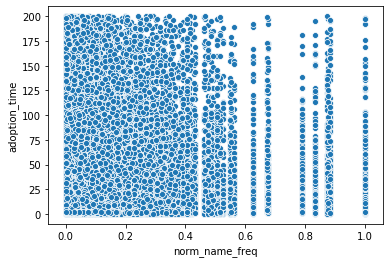

In [168]:
nameplot = sns.scatterplot(x='norm_name_freq', y='adoption_time', data=total)

In [256]:
total[total['age']=='Senior']

,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month,adoption_time,mod_adpt_time
282,Senior,Male,Small,Shih Tzu,True,True,True,False,True,CA,Low,Medium,3,27,2.012347
405,Senior,Female,Small,German Spitz,True,True,True,False,True,CA,Medium,Low,4,21,1.933182
702,Senior,Female,Medium,Labrador Retriever,True,True,True,False,True,CA,Medium,High,1,54,2.267933
713,Senior,Male,Large,German Shepherd Dog,True,True,False,True,False,CA,Low,High,11,128,2.663305
800,Senior,Male,Small,Chihuahua,False,False,True,False,False,CA,Medium,High,6,16,1.855601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184086,Senior,Female,Small,Cockapoo,True,True,False,False,True,TX,Low,Low,10,25,1.987341
184089,Senior,Female,Small,Poodle,False,True,False,False,True,TX,Medium,Medium,9,17,1.872171
184153,Senior,Male,Medium,Poodle,False,True,False,False,True,TX,Medium,Medium,1,0,1.430969
184257,Senior,Female,Small,Poodle,False,True,False,False,True,TX,Medium,Medium,5,1,1.475773


In [255]:
nameplot = sns.scatterplot(x='norm_name_freq', y='adoption_time', data=total[total['age']=='Senior'])

ValueError: Could not interpret input 'norm_name_freq'

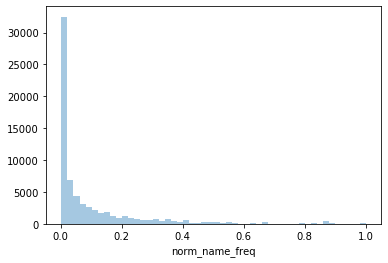

In [177]:
sns.distplot((total['norm_name_freq']), kde=False)

In [208]:
len(total[total['norm_name_freq']<0.12])/len(total)

0.7575548442042818

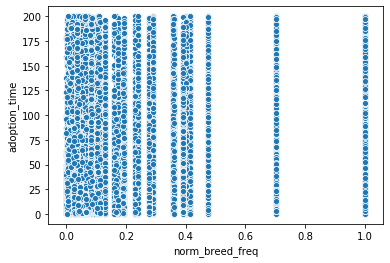

In [169]:
breedplot = sns.scatterplot(x='norm_breed_freq', y='adoption_time', data=total)

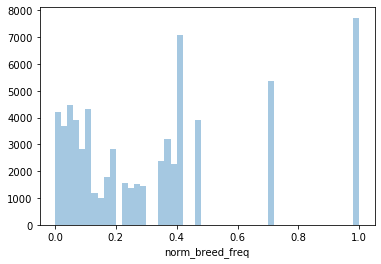

In [171]:
sns.distplot(total['norm_breed_freq'], kde=False)

In [221]:
len(total[total['norm_breed_freq']<0.12])/len(total)

0.3440280755337582

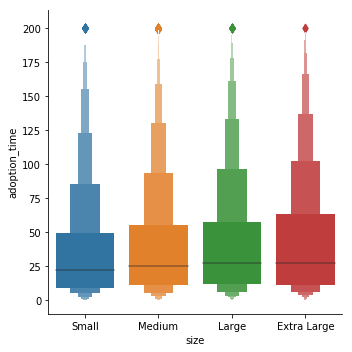

In [34]:
sizeplot = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='boxen');

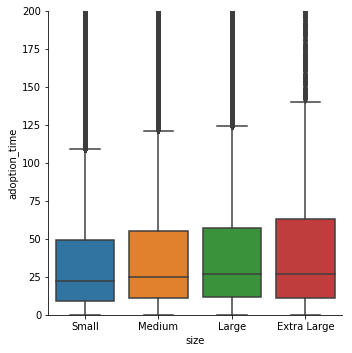

In [35]:
sizeplot2 = sns.catplot(x='size', y='adoption_time', order=["Small", "Medium", "Large", "Extra Large"] , data=total, kind='box');
sizeplot2.set(ylim=(0,200))

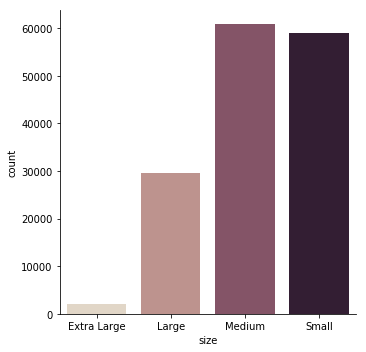

In [36]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=total);

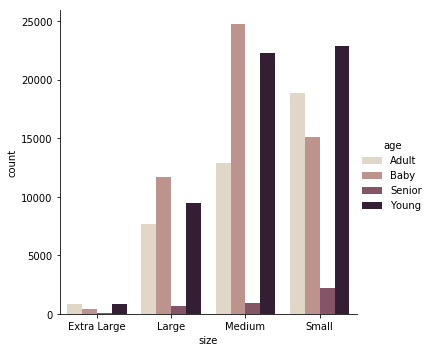

In [37]:
sns.catplot(x="size", kind="count", hue="age", palette="ch:.25", data=total);

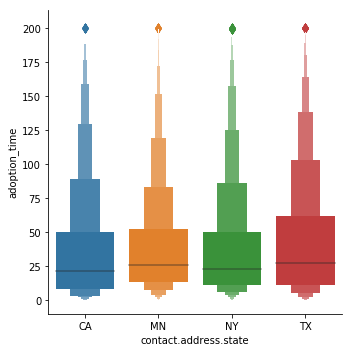

In [38]:
sns.catplot(x='contact.address.state', y='adoption_time', kind="boxen", data=total);

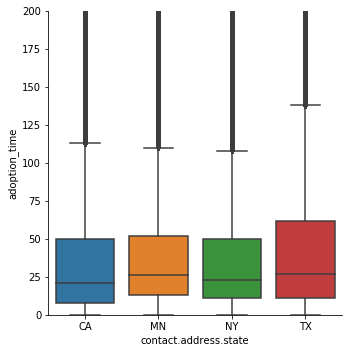

In [39]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

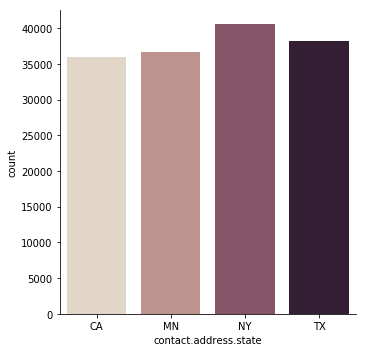

In [40]:
sns.catplot(x="contact.address.state", kind="count", palette="ch:.25", data=total);

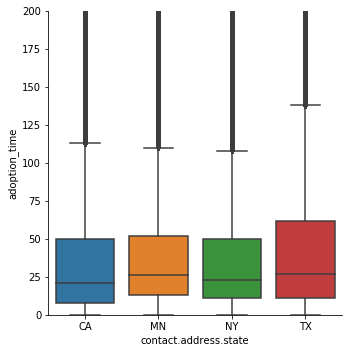

In [41]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

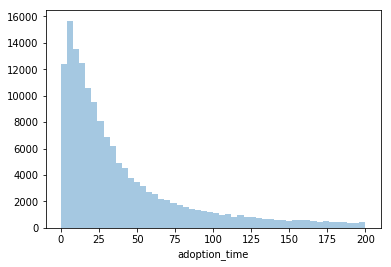

In [21]:
sns.distplot(total['adoption_time'], kde=False)

In [95]:
log_adpt_time = total.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

In [44]:
len(total)

151484

In [45]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,True,CA,19
1,Young,Male,Small,False,True,True,True,CA,29
2,Young,Male,Medium,False,True,False,True,CA,18
3,Adult,Female,Medium,False,True,False,True,CA,57
4,Young,Male,Medium,True,True,False,True,CA,8


[Text(0, 0.5, 'count'), Text(0.5, 0, 'log adoption time')]

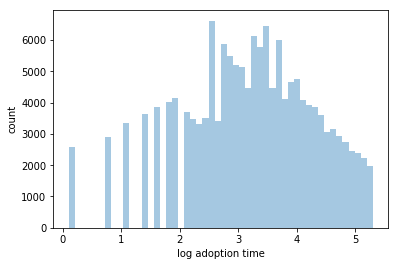

In [96]:
ax = sns.distplot(log_adpt_time, kde=False)
ax.set(xlabel='log adoption time', ylabel='count')

In [48]:
time_inv = total.apply(lambda x: 1/(x['adoption_time']+1), axis=1)

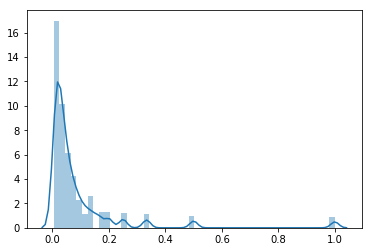

In [49]:
sns.distplot(time_inv)

In [50]:
total['log_adpt_time'] = total.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

In [51]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state,adoption_time,log_adpt_time
0,Baby,Female,Small,True,True,True,True,CA,19,3.000720
1,Young,Male,Small,False,True,True,True,CA,29,3.404525
2,Young,Male,Medium,False,True,False,True,CA,18,2.949688
3,Adult,Female,Medium,False,True,False,True,CA,57,4.062166
4,Young,Male,Medium,True,True,False,True,CA,8,2.208274


In [52]:
total['log_adpt_time'].min()

0.09531017980432493

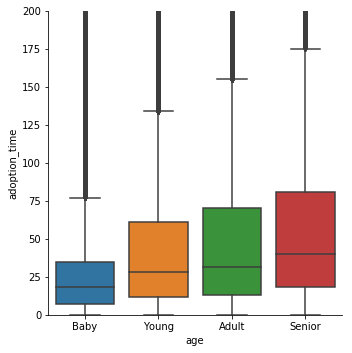

In [91]:
sizeplot3 = sns.catplot(x='age', y='adoption_time', order=["Baby", "Young", "Adult", "Senior"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

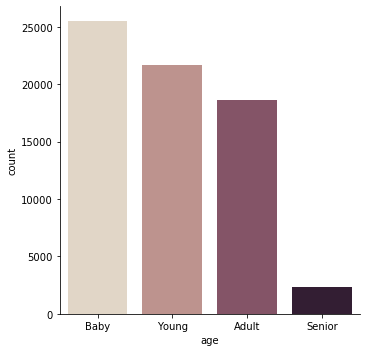

In [244]:
sns.catplot(x="age", kind="count", palette="ch:.25",order=["Baby", "Young", "Adult", "Senior"], data=total);

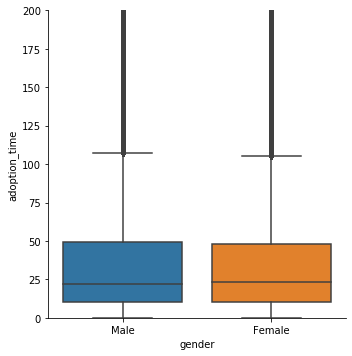

In [245]:
sizeplot3 = sns.catplot(x='gender', y='adoption_time', order=["Male", "Female"] , data=total, kind='box');
sizeplot3.set(ylim=(0,200))

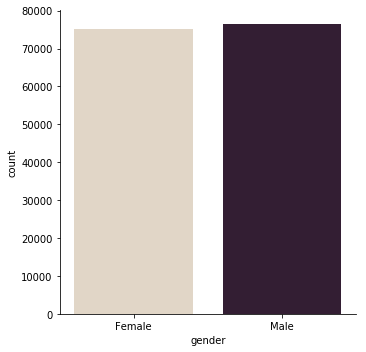

In [56]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=total);

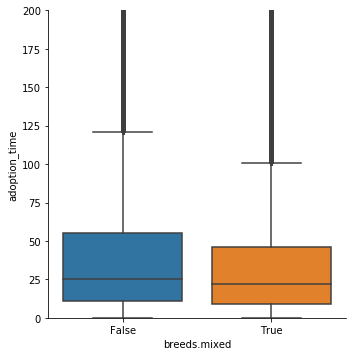

In [246]:
sizeplot3 = sns.catplot(x='breeds.mixed', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

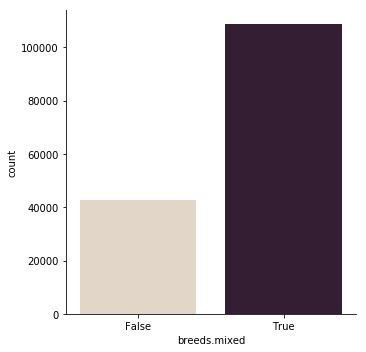

In [58]:
sns.catplot(x="breeds.mixed", kind="count", palette="ch:.25", data=total);

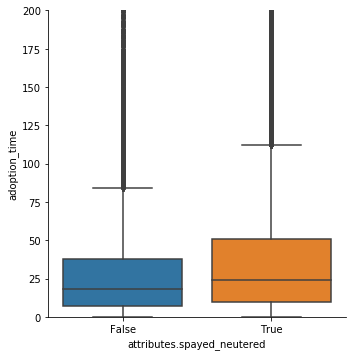

In [247]:
sizeplot3 = sns.catplot(x='attributes.spayed_neutered', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

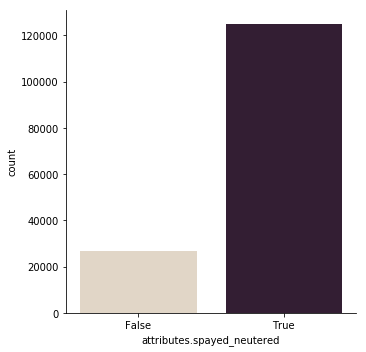

In [61]:
sns.catplot(x="attributes.spayed_neutered", kind="count", palette="ch:.25", data=total);

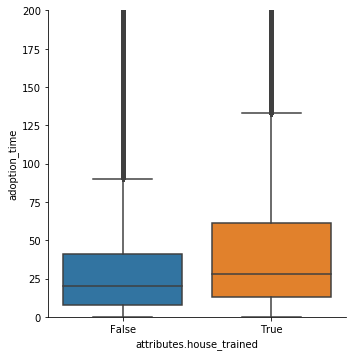

In [248]:
sizeplot3 = sns.catplot(x='attributes.house_trained', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

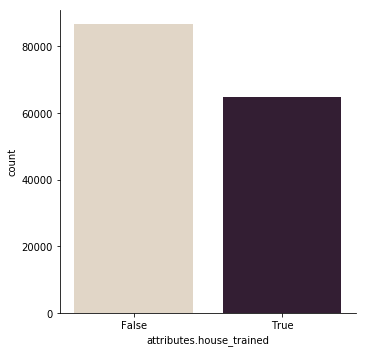

In [63]:
sns.catplot(x="attributes.house_trained", kind="count", palette="ch:.25", data=total);

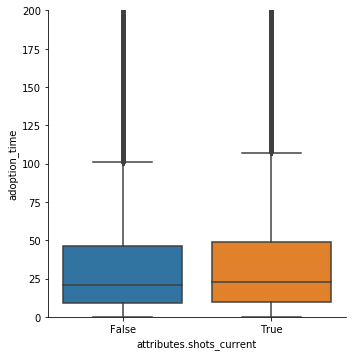

In [249]:
sizeplot3 = sns.catplot(x='attributes.shots_current', y='adoption_time', data=total, kind='box');
sizeplot3.set(ylim=(0,200))

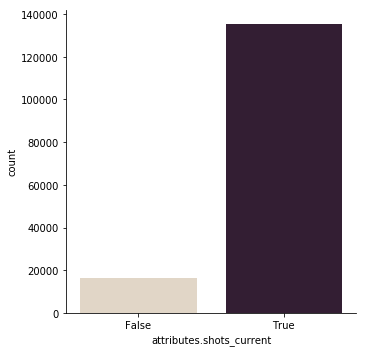

In [66]:
sns.catplot(x="attributes.shots_current", kind="count", palette="ch:.25", data=total);

In [250]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['log_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

KeyError: 'log_adpt_time'

In [69]:
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,True,True,True,CA
1,Young,Male,Small,False,True,True,True,CA
2,Young,Male,Medium,False,True,False,True,CA
3,Adult,Female,Medium,False,True,False,True,CA
4,Young,Male,Medium,True,True,False,True,CA


In [70]:
total_test = pd.concat([test_X,test_y], axis=1)

In [71]:
export = total_test.to_csv('./data/test_set_scoped_A1.csv', header=True, index = False)

In [72]:
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)

In [73]:
export = total_trainval.to_csv('./data/trainval_set_scoped_A1.csv', header=True, index = False)

In [147]:
#from scipy import stats

In [169]:
#bc_adpt_time,lmbda = stats.boxcox((total['adoption_time']+1))

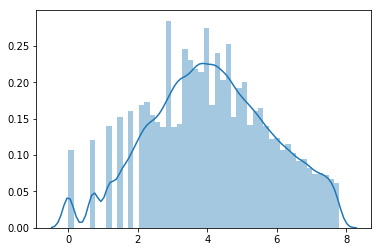

In [170]:
#sns.distplot(bc_adpt_time)

In [171]:
#lmbda

0.13720434611179522

In [172]:
#from scipy.special import boxcox,inv_boxcox

[Text(0, 0.5, 'count'), Text(0.5, 0, 'transformed time')]

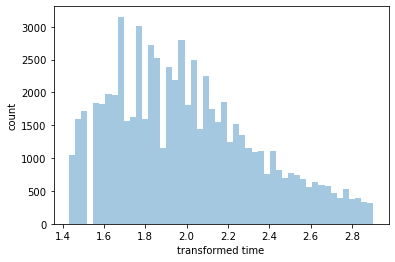

In [251]:
tf_adpt_time = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)
ax = sns.distplot(tf_adpt_time, kde=False)
ax.set(xlabel='transformed time', ylabel='count')

In [86]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,False,True,CA,19
1,Young,Male,Small,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,True,False,False,True,CA,8


In [87]:
len(X)

153436

In [252]:
total['mod_adpt_time'] = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)

In [253]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['mod_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 54481 and Test set size = 13621


In [254]:
total_test = pd.concat([test_X,test_y], axis=1)
export = total_test.to_csv('./data/test_set_scoped_A2.csv', header=True, index = False)
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)
export = total_trainval.to_csv('./data/trainval_set_scoped_A2.csv', header=True, index = False)